<h2><font color="blue" face="Roboto">Продвинутый SQL <br><i>(Вложенные запросы, объеденение таблиц)</i></font></h2>

<p><font family="Roboto">SQL — простыми словами, это язык программирования структурированных запросов (SQL, Structured Query Language), который используется в качестве эффективного способа сохранения данных, поиска их частей, обновления, извлечения из базы и удаления.</font></p>

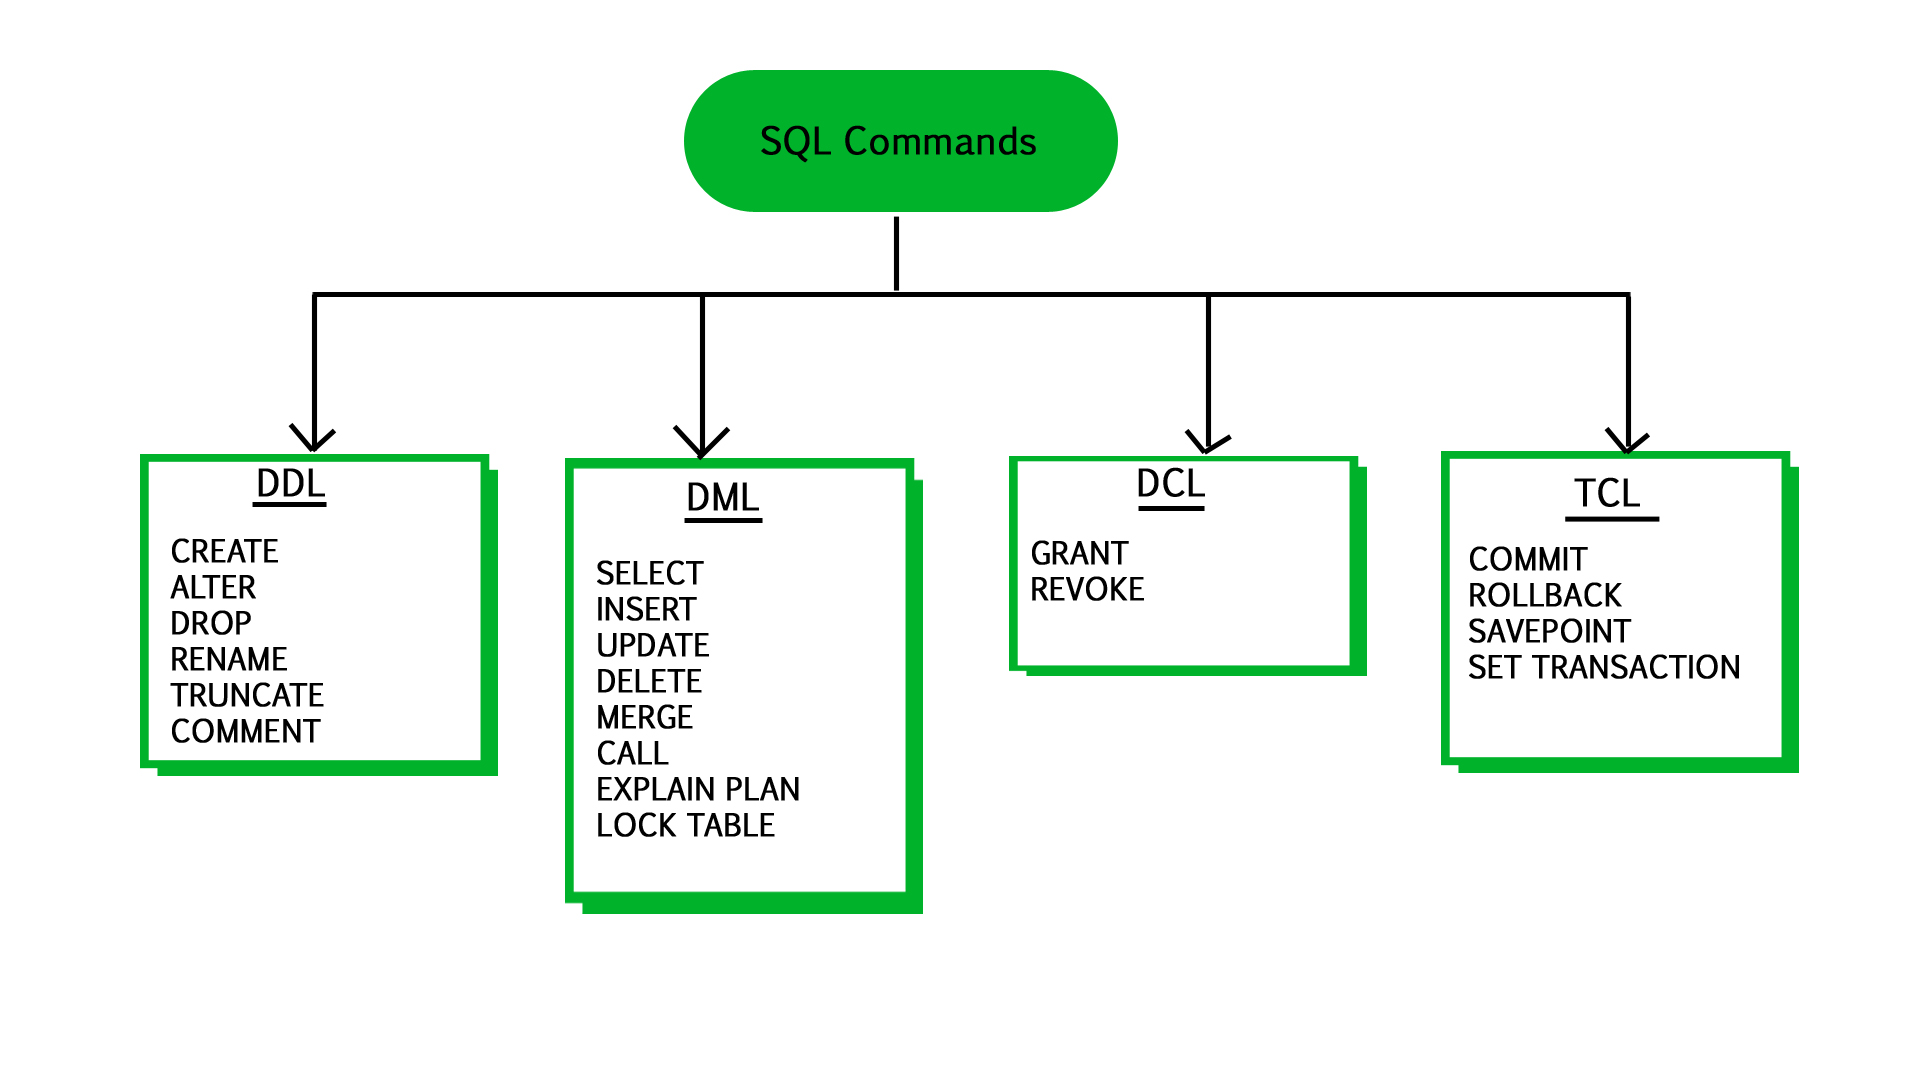

<h4>Создаём базу данных HappyReport.</h4>

In [2]:
import sqlite3 as s
con=s.connect("HappyReport")
cur=con.cursor()

<h4>Читаем сsv. <br>
Изучаем содержимое <u>файла</u>.</h4>

In [4]:
import csv 
with open("world-happiness-report-2021.csv", mode="r", encoding="utf-8") as fhr:
    read=csv.DictReader(fhr,)
    for row in read:
        print(row)
    

{'\ufeffCountry name': 'Finland', 'Regional indicator': 'Western Europe', 'Ladder score': '7.842', 'Standard error of ladder score': '0.032', 'upperwhisker': '7.904', 'lowerwhisker': '7.780', 'Logged GDP per capita': '10.775', 'Social support': '0.954', 'Healthy life expectancy': '72.000', 'Freedom to make life choices': '0.949', 'Generosity': '-0.098', 'Perceptions of corruption': '0.186', 'Ladder score in Dystopia': '2.430', 'Explained by: Log GDP per capita': '1.446', 'Explained by: Social support': '1.106', 'Explained by: Healthy life expectancy': '0.741', 'Explained by: Freedom to make life choices': '0.691', 'Explained by: Generosity': '0.124', 'Explained by: Perceptions of corruption': '0.481', 'Dystopia + residual': '3.253'}
{'\ufeffCountry name': 'Denmark', 'Regional indicator': 'Western Europe', 'Ladder score': '7.620', 'Standard error of ladder score': '0.035', 'upperwhisker': '7.687', 'lowerwhisker': '7.552', 'Logged GDP per capita': '10.933', 'Social support': '0.954', 'He

<h4>Теперь пробуем читать данные с помощью библиотеки <b>Pandas</b>.</h4>

In [6]:
import pandas
fread=pandas.read_csv("world-happiness-report-2021.csv")
df=pandas.DataFrame(fread)
print(df)

    Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4               

<h4>Как можно получить данные относительно первого столбца?</h4>

print(df['Country name'])

<h4>Создаем таблицу-reports для хранения данных о странах, региональных индикаторов и рейтинг по уровня <font color="red"><i>Happines</i></font> </h4>

In [13]:
sql='''create table if not exists report(id integer primary key not null, 
country varchar(25), RI varchar(50), score float)'''

In [14]:
print("Table created!") if (cur.execute(sql)) else print("Table Not created!")

Table created!


<h4>Запрос для добавления записи:</h4>
<img src="insert_statement.gif">

<h4><font family="Roboto">sql="insert into report(country,RI,score) <br>values<font color="blue">(.....соответсвующие данные из DF)"</font></font></h4>

In [44]:
#находим количество строк
n=len(df['Country name'])

<h4>Записываем данные в таблицу...</h4>

In [45]:
for i in range(n):
    a=str(df['Ladder score'][i])
    sql="insert into report(country, RI,score) values('"+str(df['Country name'][i])+"', '"+str(df['Regional indicator'][i])+"',"+ a+")"
    print(sql)
    cur.execute(sql)
    
    

<h4>Посмотрим результат. Выбираем данные с талицы report</h4>

<img src="select_into_statement.gif">

In [32]:
sql="Select * from report"

In [33]:
cur.execute(sql)

<h4>Как получить результат?</h4>

In [34]:
print(cur.fetchall())

[(1, 'Finland', 'Western Europe', 7.842), (2, 'Denmark', 'Western Europe', 7.62), (3, 'Switzerland', 'Western Europe', 7.571000000000001), (4, 'Iceland', 'Western Europe', 7.553999999999999), (5, 'Netherlands', 'Western Europe', 7.464), (6, 'Norway', 'Western Europe', 7.392), (7, 'Sweden', 'Western Europe', 7.363), (8, 'Luxembourg', 'Western Europe', 7.324), (9, 'New Zealand', 'North America and ANZ', 7.277), (10, 'Austria', 'Western Europe', 7.268), (11, 'Australia', 'North America and ANZ', 7.183), (12, 'Israel', 'Middle East and North Africa', 7.157), (13, 'Germany', 'Western Europe', 7.155), (14, 'Canada', 'North America and ANZ', 7.103), (15, 'Ireland', 'Western Europe', 7.085), (16, 'Costa Rica', 'Latin America and Caribbean', 7.069), (17, 'United Kingdom', 'Western Europe', 7.064), (18, 'Czech Republic', 'Central and Eastern Europe', 6.965), (19, 'United States', 'North America and ANZ', 6.9510000000000005), (20, 'Belgium', 'Western Europe', 6.834), (21, 'France', 'Western Europ

<h4>1. Напечатайте рейтинг стран региона "Western Europe"</h4>

In [36]:
#берем регион
a=input("Укажите регион=")
#выборка с условием
sql="Select country, score from report where RI='"+a+"'"
cur.execute(sql)
print(cur.fetchall())

Укажите регион=Sub-Saharan Africa
[('Mauritius', 6.0489999999999995), ('Congo (Brazzaville)', 5.3420000000000005), ('Ivory Coast', 5.306), ('Cameroon', 5.142), ('Senegal', 5.132000000000001), ('Ghana', 5.088), ('Niger', 5.074), ('Gambia', 5.051), ('Benin', 5.045), ('Guinea', 4.984), ('South Africa', 4.956), ('Gabon', 4.852), ('Burkina Faso', 4.834), ('Mozambique', 4.794), ('Nigeria', 4.7589999999999995), ('Mali', 4.723), ('Uganda', 4.636), ('Liberia', 4.625), ('Kenya', 4.607), ('Namibia', 4.574), ('Chad', 4.355), ('Swaziland', 4.308), ('Comoros', 4.289), ('Ethiopia', 4.275), ('Mauritania', 4.227), ('Madagascar', 4.208), ('Togo', 4.107), ('Zambia', 4.073), ('Sierra Leone', 3.849), ('Burundi', 3.775), ('Tanzania', 3.623), ('Malawi', 3.6), ('Lesotho', 3.512), ('Botswana', 3.467), ('Rwanda', 3.415), ('Zimbabwe', 3.145)]


<h2>Вложенные запросы</h2>

<h3>Агрегирование и группировка данных</h3>
<font family="Roboto"><h5>SUM([DISTINCT] <выражение>)</h5>
Выводит в итоговой таблице сумму значений для выражения по полям выборки. Выражение должно возвращать числовое значение.
<h5>AVG([DISTINCT] <выражение>)</h5>
Среднее значение для выражения. Выражение должно возвращать числовое значение.
<h5>COUNT([DISTINCT] <выражение> |*)</h5>
Подсчитывает число записей, в который выражение не имеет значение Null (поля имеют значение Null, когда никакое значение для них не задано). Выражение может возвращать произвольное значение.
При используемом формате функции COUNT(*) возвращает общее количество записей в БД слоя.
<h5>MAX( <выражение>)</h5>
Возвращает максимальное значение выражения для выборки.
<h5>MIN(<выражение>)</h5>
Возвращает минимальное значение выражения из выборки.</font>

<h4>1. Напечайтете страну с наивысшим рейтингом</h4>

In [39]:
#выборка с использованием агрегированной функции max
sql="Select country from report where score=(select max(score) from report)"
cur.execute(sql)

<h4>Как напечатаь название <font color="blue">страны?</font></h4>

In [40]:
print(cur.fetchone())

('Finland',)


<h4>Как напечатать название страны с <u>низким индексом</u>?</h4>

<h4>Подзапросы с ANY, IN, ALL</h4>
<h5>ANY — ключевое слово, которое должно следовать за операцией сравнения (>, <, <>, = и т.д.), возвращающее TRUE, если хотя бы одно из значений столбца подзапроса удовлетворяет обозначенному условию.</h5>
SELECT поля_таблицы_1 
FROM таблица_1 
WHERE поле_таблицы_1 <= ANY (SELECT поле_таблицы_2 FROM таблица_2);


<h3>Вопрос</h3>
<h4>Напечатайте страну и регион где индекс высше среднего</h4>

<h5>ALL — ключевое слово, которое должно следовать за операцией сравнения, возвращающее TRUE, если все значения столбца подзапроса удовлетворяет обозначенному условию.</h5>
SELECT поля_таблицы_1 
FROM таблица_1 
WHERE поле_таблицы_1 > ALL (SELECT поле_таблицы_2 FROM таблица_2);

<h4>IN — ключевое слово, являющееся псевдонимом ключевому слову ANY с оператором сравнения = (эквивалентность), либо <> ALL</h4> для NOT IN. Например, следующие запросы равнозначны:
...
<h5>WHERE поле_таблицы_1 = ANY (SELECT поле_таблицы_2 FROM таблица_2);
MySQL
...
WHERE поле_таблицы_1 IN (SELECT поле_таблицы_2 FROM таблица_2);</h5>

<h4>Напечатайте информацию о регионах "Western Europe, Middle East and North Africa, East Asia"</h4>

<h4>Запросы с использованием ORDER BY</h4>
<pre>
SELECT
   select_list
FROM
   table
ORDER BY
    column_1 ASC,
    column_2 DESC;
</pre>

<h4>Запросы с использованием Group By</h4>

<pre>SELECT 
    column_1,
    aggregate_function(column_2) 
FROM 
    table
GROUP BY 
    column_1,
    column_2;
   </pre>